In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression

In [89]:
rest = pd.read_csv('tripadvisor_european_restaurants.csv')

C:\Users\miche\anaconda3\envs\datascience38\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Vendo as características do dataframe:
rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

In [4]:
# Conhecendo o dataframe
rest.head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [11]:
rest['address'][0]

'10 Maison Neuve, 87510 Saint-Jouvent France'

In [90]:
# Olhando como estão os preços
rest[rest['price_range'].isna()==False]['price_range']

5          €14-€29
6           €8-€17
7          €10-€35
8          €12-€26
9          €12-€30
            ...   
1083380     €1-€11
1083384     €1-€11
1083385     €2-€12
1083386     €2-€20
1083395      €2-€8
Name: price_range, Length: 304327, dtype: object

In [8]:
rest.corr()


,latitude,longitude,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere
open_days_per_week,0.024614,0.030093,1.000000,0.510291,0.378161,-0.200135,0.052230,0.072354,0.043343,0.088031,0.095560,0.102615,0.117873,-0.205304,-0.190987,-0.177695,-0.139281
open_hours_per_week,-0.078304,0.102035,0.510291,1.000000,-0.075350,-0.172696,-0.005288,0.038135,0.008228,0.058086,0.070596,0.075814,0.097525,-0.202425,-0.183538,-0.147754,-0.093475
terrible,0.104480,-0.120407,0.117873,0.097525,-0.017704,-0.155270,0.449153,0.674115,0.497784,0.672637,0.791354,0.878500,1.000000,-0.190457,-0.181710,-0.195707,-0.139057
poor,0.112013,-0.116361,0.102615,0.075814,-0.011189,-0.076040,0.539704,0.805920,0.632904,0.825488,0.934195,1.000000,0.878500,-0.103778,-0.093287,-0.125787,-0.057878
working_shifts_per_week,-0.148354,-0.008401,0.378161,-0.075350,1.000000,-0.063656,0.102355,-0.015099,-0.018864,-0.004281,-0.006210,-0.011189,-0.017704,-0.058618,-0.072604,-0.085299,-0.126262
average,0.100388,-0.105644,0.095560,0.070596,-0.006210,-0.043494,0.634119,0.887308,0.733120,0.928148,1.000000,0.934195,0.791354,-0.060098,-0.051280,-0.083435,-0.014837
latitude,1.000000,0.081319,0.024614,-0.078304,-0.148354,-0.038228,-0.043844,0.096098,0.079190,0.095837,0.100388,0.112013,0.104480,-0.029360,-0.003417,-0.026510,-0.037398
very_good,0.095837,-0.110181,0.088031,0.058086,-0.004281,0.011779,0.710900,0.947613,0.842964,1.000000,0.928148,0.825488,0.672637,0.016350,0.020838,-0.010068,0.067123
total_reviews_count,-0.043844,-0.037545,0.052230,-0.005288,0.102355,0.036336,1.000000,0.736594,0.716426,0.710900,0.634119,0.539704,0.449153,0.056542,0.037101,-0.005211,0.093915
reviews_count_in_default_language,0.096098,-0.119919,0.072354,0.038135,-0.015099,0.038642,0.736594,1.000000,0.959361,0.947613,0.887308,0.805920,0.674115,0.054864,0.061827,0.026536,0.100821


In [29]:
rest.columns

Index(['restaurant_link', 'restaurant_name', 'original_location', 'country',
       'region', 'province', 'city', 'address', 'latitude', 'longitude',
       'claimed', 'awards', 'popularity_detailed', 'popularity_generic',
       'top_tags', 'price_level', 'price_range', 'meals', 'cuisines',
       'special_diets', 'features', 'vegetarian_friendly', 'vegan_options',
       'gluten_free', 'original_open_hours', 'open_days_per_week',
       'open_hours_per_week', 'working_shifts_per_week', 'avg_rating',
       'total_reviews_count', 'default_language',
       'reviews_count_in_default_language', 'excellent', 'very_good',
       'average', 'poor', 'terrible', 'food', 'service', 'value', 'atmosphere',
       'keywords', 'min_price', 'max_price'],
      dtype='object')

Vamos criar um novo dataframe onde excluímos as linhas nulas do price_range

In [67]:
rest = rest[-rest['price_range'].isna()]

Primeiro vamos transformar a coluna "price_range" em 3 colunas: min_price, avg_price, max_price

In [33]:
rest.head()

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,average,poor,terrible,food,service,value,atmosphere,keywords,min_price,max_price
5,g10029260-d6605477,L'Auberge Du Vieux Crozet,"[""Europe"", ""France"", ""Auvergne-Rhone-Alpes"", ""...",France,Auvergne-Rhone-Alpes,Loire,Le Crozet,59 place du Puits ancienne adresse le Bourg re...,46.169823,3.855819,...,2.0,2.0,1.0,4.5,4.5,4.5,NaN,NaN,€14,€29
6,g10029907-d17781655,Cafe Restaurant NouLou,"[""Europe"", ""France"", ""Occitanie"", ""Aude"", ""Sai...",France,Occitanie,Aude,Saint-Denis,"Place de l'Église, 30500 Saint-Denis France",44.233078,4.251449,...,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN,€8,€17
7,g10029907-d8079764,L'entre 2,"[""Europe"", ""France"", ""Occitanie"", ""Aude"", ""Sai...",France,Occitanie,Aude,Saint-Denis,"4 route de Saissac, 11310 Saint-Denis France",43.360023,2.219851,...,1.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN,€10,€35
8,g10036850-d8414223,Noste Courtiu,"[""Europe"", ""France"", ""Occitanie"", ""Ariege"", ""O...",France,Occitanie,Ariege,Orgibet,"route des Pyrenees, 09800 Orgibet France",42.934000,0.936559,...,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN,€12,€26
9,g10054961-d3387712,Chez Claudine,"[""Europe"", ""France"", ""Grand Est"", ""Vosges"", ""T...",France,Grand Est,Vosges,They-sous-Montfort,"136 rue de la Petite They, 88800 They-sous-Mon...",48.231495,5.973734,...,0.0,0.0,0.0,4.5,4.5,4.5,4.5,NaN,€12,€30


In [91]:
rest[['min_price', 'max_price']] = rest['price_range'].str.split('-', expand=True)
rest[['min_price', 'max_price']].head()

,min_price,max_price
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


Agora precisamos removero caracter string das colunas

In [92]:
def getNumber(x):
    return re.findall('\d+', x)[0]

In [93]:
rest['min_price'] = rest['min_price'].apply(getNumber)
rest['max_price'] = rest['max_price'].apply(getNumber)

TypeError: expected string or bytes-like object

In [75]:
rest['min_price'] = pd.to_numeric(rest['min_price'])
rest['max_price'] = pd.to_numeric(rest['max_price'])
rest['avg_price'] = (rest['min_price'] + rest['max_price']) / 2

In [77]:
rest[['min_price', 'max_price','avg_price']].head()

,min_price,max_price,avg_price
5,14,29,21.5
6,8,17,12.5
7,10,35,22.5
8,12,26,19.0
9,12,30,21.0


In [78]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304327 entries, 5 to 1083395
Data columns (total 45 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   restaurant_link                    304327 non-null  object 
 1   restaurant_name                    304327 non-null  object 
 2   original_location                  304327 non-null  object 
 3   country                            304327 non-null  object 
 4   region                             291071 non-null  object 
 5   province                           218751 non-null  object 
 6   city                               187293 non-null  object 
 7   address                            304327 non-null  object 
 8   latitude                           302173 non-null  float64
 9   longitude                          302173 non-null  float64
 10  claimed                            304327 non-null  object 
 11  awards                             110

In [83]:
rest.corr().sort_values('avg_rating')

,latitude,longitude,open_days_per_week,open_hours_per_week,working_shifts_per_week,avg_rating,total_reviews_count,reviews_count_in_default_language,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,min_price,max_price,avg_price
open_days_per_week,-0.002033,0.055123,1.000000,0.525083,0.420728,-0.187500,0.073213,0.082185,0.052031,0.101230,0.107345,0.113522,0.124626,-0.199569,-0.188447,-0.176129,-0.146869,-0.053438,-0.040245,-0.052402
terrible,0.157787,-0.132206,0.124626,0.116394,-0.018491,-0.181058,0.460372,0.686115,0.510727,0.702602,0.819497,0.901899,1.000000,-0.214519,-0.206216,-0.208681,-0.162252,0.020211,0.016762,0.020874
open_hours_per_week,-0.065232,0.100173,0.525083,1.000000,-0.055091,-0.172750,0.001214,0.053646,0.021337,0.075937,0.088340,0.096169,0.116394,-0.212036,-0.186612,-0.148386,-0.108855,-0.094955,-0.070010,-0.091949
poor,0.171117,-0.134817,0.113522,0.096169,-0.014767,-0.124176,0.536296,0.796854,0.622249,0.830547,0.937834,1.000000,0.901899,-0.153835,-0.144011,-0.169990,-0.095954,0.030327,0.029427,0.034654
working_shifts_per_week,-0.133188,-0.028589,0.420728,-0.055091,1.000000,-0.096626,0.107581,-0.021507,-0.025941,-0.009314,-0.010691,-0.014767,-0.018491,-0.077945,-0.095229,-0.111806,-0.123108,0.057945,0.060010,0.069529
average,0.162965,-0.125343,0.107345,0.088340,-0.010691,-0.091848,0.630007,0.878002,0.719917,0.930440,1.000000,0.937834,0.819497,-0.109871,-0.102144,-0.130661,-0.049129,0.036135,0.035370,0.041530
very_good,0.160742,-0.129215,0.101230,0.075937,-0.009314,-0.042202,0.709985,0.942582,0.832153,1.000000,0.930440,0.830547,0.702602,-0.039916,-0.036757,-0.062675,0.033967,0.035220,0.032772,0.039151
latitude,1.000000,0.072958,-0.002033,-0.065232,-0.133188,-0.033936,-0.003793,0.158079,0.133680,0.160742,0.162965,0.171117,0.157787,-0.036635,-0.022799,-0.034885,-0.080705,-0.005475,-0.004500,-0.005647
total_reviews_count,-0.003793,-0.045686,0.073213,0.001214,0.107581,-0.013391,1.000000,0.739150,0.718053,0.709985,0.630007,0.536296,0.460372,0.009141,-0.013609,-0.051182,0.080524,0.100862,0.093322,0.111751
avg_price,-0.005647,0.009642,-0.052402,-0.091949,0.069529,-0.013157,0.111751,0.046088,0.047061,0.039151,0.041530,0.034654,0.020874,0.013699,-0.004063,-0.091145,0.044466,0.692787,0.934047,1.000000


(array([3.00484e+05, 2.83700e+03, 4.47000e+02, 3.17000e+02, 8.20000e+01,
        8.00000e+01, 4.60000e+01, 2.00000e+01, 7.00000e+00, 7.00000e+00]),
 array([5.0000e-01, 8.0450e+01, 1.6040e+02, 2.4035e+02, 3.2030e+02,
        4.0025e+02, 4.8020e+02, 5.6015e+02, 6.4010e+02, 7.2005e+02,
        8.0000e+02]),
 <BarContainer object of 10 artists>)

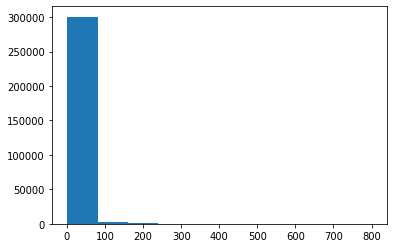

In [82]:
plt.hist(rest['avg_price'])

Para criar um modelo de predição, vamos considerar apenas as variáveis que possui correlação acima de 0.5.

In [87]:
restf = rest[['food', 'service', 'atmosphere', 'value', 'excellent', 'avg_rating']]

In [94]:
# Mantendo apenas as linhas que possuem avaliação
restf = restf[-restf['avg_rating'].isna()]

In [115]:
restf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85548 entries, 9 to 1083251
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   food        85548 non-null  float64
 1   service     85548 non-null  float64
 2   atmosphere  85548 non-null  float64
 3   value       85548 non-null  float64
 4   excellent   85548 non-null  float64
 5   avg_rating  85548 non-null  float64
dtypes: float64(6)
memory usage: 4.6 MB


In [114]:
restf = restf.dropna()

# Splitting the data

In [147]:
# Separando os dados
X = restf.drop('avg_rating', axis=1)
Y = restf['avg_rating']
xtr, xte, ytr, yte = train_test_split(X, Y, test_size=0.3, random_state=1)

# Random Forest Regressor

In [112]:
rfr = RandomForestRegressor()

In [143]:
rfr.fit(xtr, ytr)

RandomForestRegressor()

In [150]:
rfr_predictions = rfr.predict(xte)

# Linear Regression

In [149]:
lm = LinearRegression()
lm.fit(xtr, ytr)
lm_predictions = lm.predict(xte)

# Evaluating the models

In [151]:
from sklearn import metrics

================ RANDOM FOREST REGRESSOR ================
MAE: 0.1520147035914918
MSE: 0.05096354367279718
RMSE: 0.2257510657179655


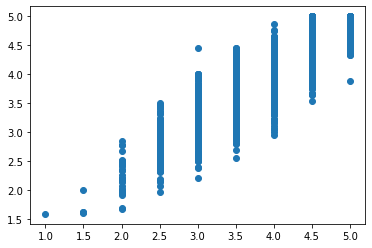

In [157]:
print("================ RANDOM FOREST REGRESSOR ================")
print('MAE:', metrics.mean_absolute_error(yte, rfr_predictions))
print('MSE:', metrics.mean_squared_error(yte, rfr_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(yte, rfr_predictions)))
plt.scatter(yte, rfr_predictions)


================ LINEAR REGRESSOR ================
MAE: 0.15429495244724545
MSE: 0.04495723294045902
RMSE: 0.21203120746828524


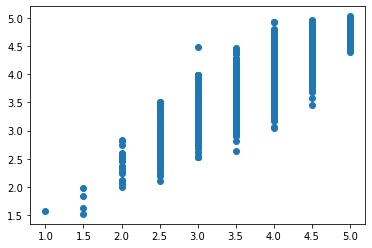

In [158]:
print("================ LINEAR REGRESSOR ================")
print('MAE:', metrics.mean_absolute_error(yte, lm_predictions))
print('MSE:', metrics.mean_squared_error(yte, lm_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(yte, lm_predictions)))
plt.scatter(yte, lm_predictions)

Text(0.5, 1.0, 'RFR Residuals')

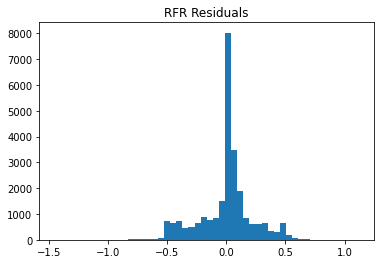

In [159]:
plt.hist(yte - rfr_predictions, bins=50)
plt.title('RFR Residuals')

Text(0.5, 1.0, 'LM Residuals')

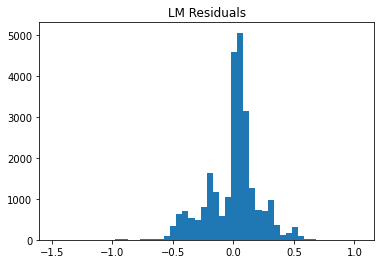

In [160]:
plt.hist(yte - lm_predictions, bins=50)
plt.title('LM Residuals')

MAE: 0.15429495244724545
MSE: 0.04495723294045902
RMSE: 0.21203120746828524


In [142]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
food,0.426047
service,0.323312
atmosphere,0.042490
value,0.159845
excellent,0.000067
